Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Quanpu Xiao"
STUDENT_ID = "14368978"

---

# Part 1
In this exercise, we will use your newly discovered classification skills to classify whether a couple is likely to have a successful relationship based on their astrological signs.
In this fictional data set, astrological signs do affect compatibility in some ways which you will have to discover. The effects of astrological signs which we have generated for this exercise may differ from real life, in that there are any.

Classification is supervised learning, which means that we already know the outcome for some data, and use this data to train a model to classify unknown data.
So, in our capacity as spiritual match-makers, we have compiled a list of relationships to train our classifier with.

In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Practice Task 1 (0 points)
We have two .csv files with data: couples.csv, and persons.csv.
Couples.csv contains the outcome we'd like to predict, but no useful variables to base our prediction on. It only tells us the id of the two partners.
It's best if we have both X and Y in a single dataframe before we proceed.
Create a dataframe called 'data' with the columns: couple_id, person_a, person_b, outcome, sign_a, sign_b, with the respective signs of persons a and b for each couple.

In [3]:
# YOUR CODE HERE
couples = pd.read_csv('couples.csv')
persons = pd.read_csv('persons.csv')

print("Couples DataFrame columns:", couples.columns)
print("Persons DataFrame columns:", persons.columns)

data = couples.merge(persons, left_on='person_a', right_on='id')
data = data.merge(persons, left_on='person_b', right_on='id', suffixes=('_a', '_b'))

data = data[['id', 'person_a', 'person_b', 'outcome', 'sign_a', 'sign_b']]

data = data.rename(columns={'id': 'couple_id'})

data['sign_a'] = data['sign_a'].apply(lambda x: x.split(',')[0])
data['sign_b'] = data['sign_b'].apply(lambda x: x.split(',')[0])

print(data.head())

Couples DataFrame columns: Index(['id', 'person_a', 'person_b', 'outcome'], dtype='object')
Persons DataFrame columns: Index(['id', 'age', 'gender', 'sign', 'tarot', 'favorite_color',
       'favorite_animal'],
      dtype='object')
   couple_id  person_a  person_b    outcome  sign_a       sign_b
0          1         0         1  broken up  taurus       taurus
1          3         2         3  broken up   libra        libra
2          5         4         5    married     leo  sagittarius
3          7         6         7   divorced   libra        virgo
4          9         8         9    married   aries        virgo


Let's now have a look at the possible outcome variables.

/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='outcome', ylabel='count'>

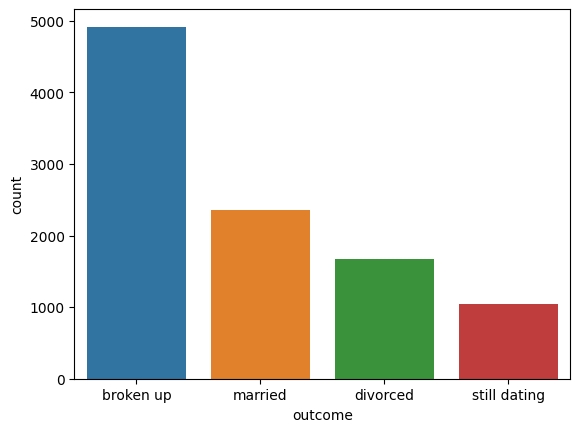

In [4]:
# Let's plot the outcomes
couples = pd.read_csv('couples.csv')
sns.countplot(data=couples, x='outcome')

# Practice Task 2 (0 points)
As we can see, one possible outcome for couples is marriage. Although we can train a classifier to classify multiple outcome labels, let's keep it simple for now: We will simply classify whether a couple will be married or not. For this purpose, let's create a one-hot encoding: Create a column for data called 'married' which is equal to 1 if the couple is married and 0 otherwise.

In [5]:
# YOUR CODE HERE
data['married'] = data['outcome'].apply(lambda x: 1 if x == 'married' else 0)
print(data.head())

   couple_id  person_a  person_b    outcome  sign_a       sign_b  married
0          1         0         1  broken up  taurus       taurus        0
1          3         2         3  broken up   libra        libra        0
2          5         4         5    married     leo  sagittarius        1
3          7         6         7   divorced   libra        virgo        0
4          9         8         9    married   aries        virgo        1


# Practice Task 3 (0 points):
Now we need to do the same to X: our input features. Since we have two categorical variables (sign_a and sign_b) with 12 possible values each, let's use sklearn's OneHotEncoder class to create vectors instead of manually creating 24 columns. Create a numpy array called 'features' of shape (5000, 24) which contains our one-hot encoded feature vectors.
You can follow the first example of the class' documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [6]:
# YOUR CODE HERE

# signs_subset = data[['sign_a', 'sign_b']].head(5000)
signs_subset = data[['sign_a', 'sign_b']].head(10000)

# OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_signs = encoder.fit_transform(signs_subset)

features = encoded_signs

print("Shape of features array:", features.shape)

Shape of features array: (10000, 24)


/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

# Practice Task 4 (0 points)
Now we have everything we need: One-hot encoded features and the binary label 'married'.
During the lecture you learned about binary logistic regression. Since our output variable is either 0 or 1, this seems like an ideal use case for it!
Above, we imported LogisticRegression from sklearn. Have a look at the documentation, and implement it with default parameters for our data:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
Don't worry about test and train sets yet; we'll train our model on all the data and then evaluate it on the same data.

In [7]:
X = features
y = data['married']
# YOUR CODE HERE
classifier = LogisticRegression()
classifier.fit(X, y)

classifier.score(X, y)

/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

0.7644

# Practice Task 5 (0 points)
76% accuracy! That doesn't sound bad for a first attempt. But remember the zero-rate classifier? Let's have a look at what our baseline should be.
Above, we plotted all possible outcome variables. Have a look what's more likely: married (1), or not married (0)? Then create a zero-rate classifier that always returns the most likely result.
The estimated outcome value y is often denoted as ŷ, which is why we call it y_hat here.

In [8]:
def zero_rate(x) -> int:
    """
    Takes the input vector x and then completely disregards it.

    Returns:
        y(int): Whether or not the couple is married.
    """

    # YOUR CODE HERE
    most_frequent_outcome = data['married'].value_counts().idxmax()
    
    return most_frequent_outcome

y_hat = [zero_rate(x) for x in features]
# We imported accuracy_score from sklearn.metrics
acc = accuracy_score(y, y_hat)
print(acc)

0.7644


/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Oh no, our zero-rate classifier is just as accurate as our logistic regression classifier.
It seems our standard logistic regression model could not predict marriage based on astrological signs with any accuracy higher than chance.
Does that mean that the signs simply have to effect on courting outcome? That would perhaps be the conclusion if this was astronomy class, but we wouldn't give you such a boring dataset for classification class would we?
Assume there is some way in which the signs of the two partners affect their relationship. How come our model did not pick up on those?
Can you think of a way in which the features could be re-coded so that logistic regression would predict the outcome with higher accuracy?
Hint: A possible solution is shown in the next code cell. Try to think of one yourself first, but if you cannot, figure out why the sample solution works and then explain it here.

# Part 2

# Question 1: (1 point, 30-150 words)
Why did logistic regression not achieve useful accuracy? 

Since logistic regression assumes linear relationship between the variables, if such relationship is not there in the data, the model may be limited when doing predictions. Also, if this dataset is imbalanced for different types of couples, the model may also be biased and predicting more frequent present class.

In [9]:
# Create sign pairs for each possible combination
sign_combination = data['sign_a'] + '-' + data['sign_b']
# Shape them into an array with n samples and a single feature
sign_combination = np.asarray(sign_combination).reshape(-1, 1)
# One-hot encode
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(sign_combination)
features = enc.transform(sign_combination).toarray()
# Train and evaluate our classifier on these new features
X = features
y = data['married']
classifier = LogisticRegression(random_state=0).fit(X, y)
classifier.score(X, y)

/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

0.7889

This seems to have marginally improved the accuracy of our model. Let's see if we can improve it further by building more complex models and taking more information into account.

Another variable we have available is each person's last tarot reading. Let's see if we can improve out model by including this variable.

In [10]:
# Add the tarot information from persons to our data
data['tarot_a'] = couples['person_a'].apply(lambda x: persons[persons['id'] == x]['tarot'].iat[0])
data['tarot_b'] = couples['person_b'].apply(lambda x: persons[persons['id'] == x]['tarot'].iat[0])

# Add the tarot columns to your features
features = np.c_[features, data['tarot_a'].tolist()]
features = np.c_[features, data['tarot_b'].tolist()]

In [11]:
# Train and evaluate our classifier on these new features
X = features
y = data['married']
classifier = LogisticRegression(random_state=0, max_iter=300).fit(X, y)
classifier.score(X, y)

/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

0.7922

This doesn't seem to significantly increase our accuracy. Maybe the variable isn't very useful, or maybe we are not using it right. Let's explore a bit.
First, let's plot the distribution over values

/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tarot_a', ylabel='Count'>

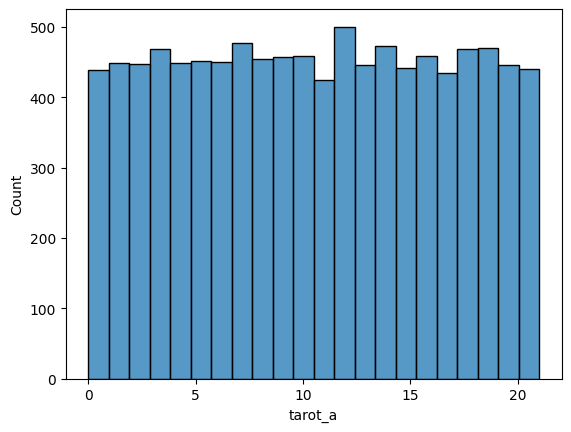

In [12]:
sns.histplot(data['tarot_a'], bins=22)

The different tarot cards seem more or less uniformly distributed.
Let's color this plot by outcome to see if there is really no effect.

/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Axes: xlabel='tarot_b', ylabel='Count'>

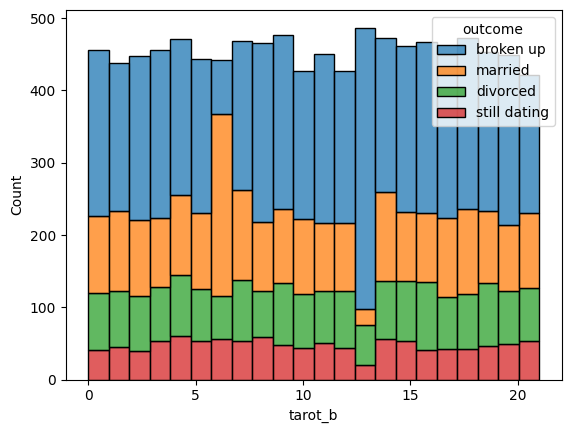

In [13]:
sns.histplot(data=data, x='tarot_b', hue='outcome', bins=22, multiple='stack')

# Question 2: (2 points, 50-200 words)
Explain what you see in the histogram above. What conclusion about the effect of tarot cards on partnership outcomes can you detect visually? If there are any effects, how might you take them into account, since using a numerical regressor for tarot seemed not to work?


The first histogram shows a uniform distribution across different readings of tarot_a, indicating no significant variation that would suggest an impact on the measured outcomes. The second histogram for tarot_b with colored representation for different outcomes also does not show a clear pattern. So, visually there is no clear effect of the tarot card readings on partnership outcomes, and if we assume there will be an effect, it does not seems to be linear or directly proportional. Alternative methond may be useful for further analysis. 

In [14]:
# This function reimports the data. You can use to reset your data in case you manipulated it earlier.
# It also adds two additional features which we have not previously used
# DO NOT CHANGE this function; it will be used when evaluating your code below.
def load_data(couples_file = 'couples.csv', persons_file = 'persons.csv'):
    couples = pd.read_csv(couples_file)
    persons = pd.read_csv(persons_file)
    data = couples.copy()
    data['sign_a'] = couples['person_a'].apply(lambda x: persons[persons['id'] == x]['sign'].iat[0])
    data['sign_b'] = couples['person_b'].apply(lambda x: persons[persons['id'] == x]['sign'].iat[0])
    data['tarot_a'] = couples['person_a'].apply(lambda x: persons[persons['id'] == x]['tarot'].iat[0])
    data['tarot_b'] = couples['person_b'].apply(lambda x: persons[persons['id'] == x]['tarot'].iat[0])
    data['color_a'] = couples['person_a'].apply(lambda x: persons[persons['id'] == x]['favorite_color'].iat[0])
    data['color_b'] = couples['person_b'].apply(lambda x: persons[persons['id'] == x]['favorite_color'].iat[0])
    data['animal_a'] = couples['person_a'].apply(lambda x: persons[persons['id'] == x]['favorite_animal'].iat[0])
    data['animal_b'] = couples['person_b'].apply(lambda x: persons[persons['id'] == x]['favorite_animal'].iat[0])
    return data

data = load_data()

# Task 1 (1 point):
Complete the functions below. You have already written most of the required code above.

In [15]:
def transform_outcome(data):
    """
    Returns:
        np.array of shape (n_samples)
    """
    # Insert the code you wrote above which one-hot encodes the marriage status here
    # YOUR CODE HERE
    data['married'] = data['outcome'].apply(lambda x: 1 if x == 'married' else 0)

    return np.array(data['married'])

# This function applies your transformations to the data.
# You can improve this function with any transformations you think improve the data for ML.
def transform_features(data):
    """
    Returns:
        np.array of shape (n_samples, n_features)
    """
    # This is our code from above which one-hot encodes the sign combiation
    sign_combination = data['sign_a'] + '-' + data['sign_b']
    sign_combination = np.asarray(sign_combination).reshape(-1, 1)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(sign_combination)
    sign_features = enc.transform(sign_combination).toarray()
    # Write code here which transforms tarot_a and tarot_b into useful features.
    # Create a variable called tarot_features which is a numpy array of dimensions (n_samples, n_features)
    # YOUR CODE HERE
    tarot_a = data['tarot_a'].values.reshape(-1, 1)
    tarot_b = data['tarot_b'].values.reshape(-1, 1)
    enc_tarot = OneHotEncoder(handle_unknown='ignore')
    enc_tarot.fit(np.vstack((tarot_a, tarot_b)))
    tarot_features_a = enc_tarot.transform(tarot_a).toarray()
    tarot_features_b = enc_tarot.transform(tarot_b).toarray()
    tarot_features = np.hstack((tarot_features_a, tarot_features_b))

    color_a = data['color_a'].values.reshape(-1, 1)
    color_b = data['color_b'].values.reshape(-1, 1)
    enc_color = OneHotEncoder(handle_unknown='ignore')
    enc_color.fit(np.vstack((color_a, color_b)))
    # Insert any additional features you'd like to add to your model here.
    # These can be additional transformations of the variables used so far, or can use the variables we have not included so far.

    # All features are combined here. If you generated more features, add them to the line below.
    features = np.hstack((sign_features, tarot_features))
    return features
    
y = transform_outcome(data)
X = transform_features(data)

Improve your transform_features() function until logistic regression based on your features achieves an accuracy of at least 80%

In [16]:
# Run logistic regression with the new features you created with the function above.
classifier = LogisticRegression(random_state=0, max_iter=300).fit(X, y)
classifier.score(X, y)

0.8156

# Task 2 (1 point)
We've tinkered quite a bit with our features now. What about our classification model? Regression is one of the supervised ML techniques you have learned, but there are of course many others.
While each technique requires understanding to apply it well, technically implementing them is made quite easy by sklearn, especially when using default hyperparameters and optimization.
Show us that you know how to use online documentation to implement other ML models below. These two classifiers should also achieve 80% accuracy or higher. See what how accurate you can get with each type of classifier.
First, implement a random forest classifier.

In [17]:
# Using the same features which you used for regression above, implement a random forest classifier and print the accuracy score.
# Make sure it is called rf_classifier
rf_classifier = ...
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=0)

rf_classifier.fit(X, y)

accuracy = rf_classifier.score(X, y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9817


# Task 3 (1 point)
Second, implement a random forest classifier.

In [18]:
# Using the same features which you used for regression above, implement a neural network, specifically a multilayer perceptron classifier, and print the accuracy score.
# Implement a perceptron with at least 2 hidden layers, and preferably one which can be trained in under a minute on an average laptop.
# Make sure it is named nn_classifier
nn_classifier = ...
# YOUR CODE HERE
# I assume this TASK 3 is about the neural network, not the random forest classifier mentioned above
from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=0)

nn_classifier.fit(X, y)

accuracy = nn_classifier.score(X, y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9818


# Task 4 (2 points)
So far, you have trained your models on all available data. This means that while you may achieve a great fit to the data you have, your model may be overfitted and perform poorly on new, unseen data. This final exercise will be evaluated with couples and individuals which you do not have access to. They are from the same population as your sample, so your model should work fine if you don't overfit. Implement any sklearn classification model you like (logistic regression recommended) with a test/train(/evaluate) split or cross-validation.

Your model will be evaluated by accuracy score, so try to achieve as high a score as possible while avoiding overfitting.
Please make sure your model is trained in a reasonable time frame on an average laptop (a few minutes maximum)

In [24]:
# If you are changing your features, either change the function transform_features above, or implement a new function named transform_features!
# The unseen test data will be transformed by this function also!
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(data[['tarot_a', 'tarot_b']])

def transform_features(data):
    encoder = OneHotEncoder(sparse=False)
    categorical_features = encoder.fit_transform(data[['sign_a', 'sign_b', 'color_a', 'color_b', 'animal_a', 'animal_b']])
    features = np.hstack([categorical_features, numerical_features_scaled])
    return features

# Implement your model here. Make sure it is named final_classifier
X = transform_features(data)
y = transform_outcome(data)
final_classifier = ...

# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=3)
grid_search.fit(X, y)

# Evaluate the model
final_classifier = grid_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
final_classifier.fit(X_train, y_train)

predictions_test = final_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
print(f"Test Accuracy: {accuracy_test}")

/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aoyamaxx/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

Test Accuracy: 0.7803333333333333


Well done, you've completed all the exercises. Make sure to restart your kernal and rerun all cells once before submitting to ensure that the notebook will run as expected.
Here is a checklist of all graded parts for you to check:
 - 1 pt - Question 1
 - 2 pt - Question 2
 - 1 pt - Task 1: The classifier achieves an accuracy of 80% or higher
 - 1 pt - Task 2: The random forest classifier achieves an accuracy of 80% or higher
 - 1 pt - Task 3: The perceptron classifier achieves an accuracy of 80% or higher
 - 2 pt - Task 4: Your chosen classifier achieves a high accuracy on unseen data.